# Iterative Solvers
## March 22nd, 2022
### Overview: Using iterative methods to approximate solutions to linear equations

In [90]:
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt

In [94]:
def diag_dom(n, num_entries=None, as_sparse=False):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
    n (int): The dimension of the system.
    num_entries (int): The number of nonzero values.
    Defaults to n^(3/2)-n.
    as_sparse: If True, an equivalent sparse CSR matrix is returned.
    Returns:
    A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = sparse.dok_matrix((n,n))
    rows = np.random.choice(n, size=num_entries)
    cols = np.random.choice(n, size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    B = A.tocsr() # convert to row format for the next step
    for i in range(n):
        A[i,i] = abs(B[i]).sum() + 1
    return A.tocsr() if as_sparse else A.toarray()

In [54]:
# Problems 1 and 2
def jacobi(A, b, tol=1e-8, maxiter=100,plot=False):
    """Calculate the solution to the system Ax = b via the Jacobi Method.

    Parameters:
        A ((n,n) ndarray): A square matrix.
        b ((n ,) ndarray): A vector of length n.
        tol (float): The convergence tolerance.
        maxiter (int): The maximum number of iterations to perform.

    Returns:
        ((n,) ndarray): The solution to system Ax = b.
    """
    #get the diagonal of A
    D = np.diag(A)
    
    #init x0
    x0 = np.zeros(len(D))
    #init errors list
    Errs = []
    
    #init counter
    k = 1
    while k < maxiter:
        #calc next x1
        x1 = x0 + (b - A@x0)/D
        
        #find and record absolute error
        abs_err = np.linalg.norm(A@x1 - b,ord=np.inf)
        Errs.append(abs_err)
        
        #check tol
        if np.linalg.norm(x1 - x0,ord=np.inf) < tol:
            break
        
        #set next x0 and inc counter
        x0 = x1
        k += 1
    
    #plotting if plot
    if plot:
        plt.semilogy(np.arange(1,k+1),Errs)
        plt.xlabel('iteration')
        plt.ylabel('absolute error')
        plt.show()
    
    return x1

In [83]:
b = np.random.random(500)
A = diag_dom(n=500)

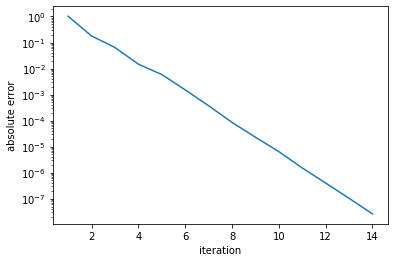

In [55]:
x1 = jacobi(A,b,plot=True)

In [86]:
# Problem 3
def gauss_seidel(A, b, tol=1e-8, maxiter=100, plot=False):
    """Calculate the solution to the system Ax = b via the Gauss-Seidel Method.

    Parameters:
        A ((n, n) ndarray): A square matrix.
        b ((n, ) ndarray): A vector of length n.
        tol (float): The convergence tolerance.
        maxiter (int): The maximum number of iterations to perform.
        plot (bool): If true, plot the convergence rate of the algorithm.

    Returns:
        x ((n,) ndarray): The solution to system Ax = b.
    """
    #get the diagonal of A
    D = np.diag(A)
    
    #init x0 and x1
    x0 = np.zeros(len(D))
    x1 = np.zeros(len(D))
    #init errors list
    Errs = []
    
    #init iter counter and i index
    k = 1
    while k < maxiter:
        #find next x1
        for i in range(len(D)):
            x1[i] = x0[i] + (b[i] - np.dot(A[i],x0) )/A[i,i]
        
        #find and record absolute error
        abs_err = np.linalg.norm(A@x1 - b,ord=np.inf)
        Errs.append(abs_err)
        
        #check tol
        if np.linalg.norm(x1 - x0,ord=np.inf) < tol:
            break
        
        #set next x0 and inc counter
        x0 = x1.copy()
        k += 1
    
    #plotting if plot
    if plot:
        plt.semilogy(np.arange(1,k+1),Errs)
        plt.xlabel('iteration')
        plt.ylabel('absolute error')
        plt.show()
        
    return x1

1 0.0503359095754112
2 0.011746543443698694
3 0.00426052261011722
4 0.0009910285805563024
5 0.00032733278633122545
6 8.078838894077373e-05
7 2.391883604929007e-05
8 6.862571951107843e-06
9 2.1009143814712528e-06
10 3.776775393642129e-07
11 9.744474702318151e-08
12 2.5862377723770424e-08
13 7.0775030627800994e-09


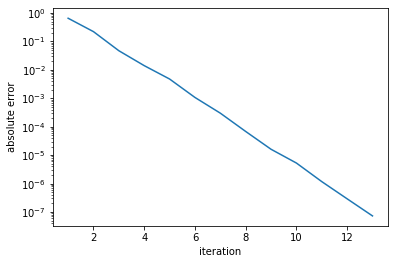

In [88]:
x = gauss_seidel(A,b,plot=True)

In [89]:
np.allclose(A@x - b,np.zeros(len(x)))

array([-3.03072377e-08, -3.10421355e-09,  1.82324241e-08, -3.78501561e-08,
       -1.90702288e-08,  4.23841668e-08,  2.51319335e-08,  1.21031318e-09,
       -2.28025152e-08, -2.80289647e-09,  1.83179297e-08, -2.39680802e-08,
        3.78552758e-08, -1.11932245e-08, -5.10039011e-10, -3.65379232e-08,
        1.13332035e-08,  2.00080948e-08, -2.98438881e-08,  1.31644186e-08,
       -8.56759041e-09, -3.76366266e-08,  1.76349493e-08, -5.76120825e-08,
        5.06076299e-08, -1.87640571e-08,  1.13402938e-08, -2.24433956e-08,
       -2.27226688e-08, -2.41295879e-08,  1.71254445e-08, -6.37092490e-10,
       -6.89890839e-09, -4.99812243e-08,  5.49221074e-09,  1.95895321e-08,
       -3.56964431e-08,  8.67370720e-09, -3.59421941e-08, -1.59885381e-08,
        4.83541481e-08,  4.73328035e-09, -3.13196358e-09, -1.35584063e-08,
       -2.13077822e-08, -4.12809420e-09, -1.96941492e-08,  1.35126244e-10,
       -1.24210819e-08, -8.62078231e-09, -1.04838415e-08, -3.69882906e-08,
       -1.57469655e-08, -

In [136]:
# Problem 4
def gauss_seidel_sparse(A, b, tol=1e-8, maxiter=100):
    """Calculate the solution to the sparse system Ax = b via the Gauss-Seidel
    Method.

    Parameters:
        A ((n, n) csr_matrix): A (n, n) sparse CSR matrix.
        b ((n, ) ndarray): A vector of length n.
        tol (float): The convergence tolerance.
        maxiter (int): the maximum number of iterations to perform.

    Returns:
        x ((n,) ndarray): The solution to system Ax = b.
    """
    #get the diagonal of A
    D = A.diagonal()
    
    #init x0 and x1
    x0 = np.zeros(len(D))
    x1 = np.zeros(len(D))
    
    #init iter counter and i index
    k = 1
    while k <= maxiter:
        #find next x1
        for i in range(len(D)):
            #indices of start and end of current row of A
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            
            #component used for updating
            Aix = A.data[rowstart:rowend] @ x0[A.indices[rowstart:rowend]]
            #update
            x1[i] = x0[i] + (1/A.diagonal()[i])*( b[i] - Aix )
        
        #check tol
        if np.linalg.norm(x1 - x0,ord=np.inf) < tol:
            break
        
        #set next x0 and inc counter
        x0 = x1.copy()
        k += 1
        
    return x1

In [111]:
A = diag_dom(420, as_sparse=True)
b = np.random.random(420)

In [114]:
x = gauss_seidel_sparse(A,b)

In [115]:
A@x - b

array([ 1.48939949e-09,  2.88657267e-08, -2.93494631e-10,  2.34033126e-09,
       -2.05163483e-08, -2.86343123e-08,  1.94371531e-08, -4.09401915e-08,
        2.65300072e-08,  9.77659237e-09, -2.15730369e-08,  2.76619644e-08,
       -3.85051764e-08, -2.83338627e-08, -2.68979350e-08,  2.34666003e-08,
       -2.36882358e-09, -1.89604518e-08, -2.96844874e-08,  2.41019389e-08,
       -3.12309636e-08,  1.38961680e-08, -1.15822152e-08,  2.31093684e-08,
        1.19527193e-08, -3.95006321e-08, -2.90266863e-08, -1.68027741e-08,
       -3.01555947e-09,  1.84669861e-08,  1.20227012e-08, -1.71684004e-08,
       -1.94245265e-08, -9.34936822e-10, -3.42780631e-08,  3.58721974e-09,
       -6.13168205e-09, -6.48076315e-09,  4.54940269e-09, -1.57480450e-08,
       -2.83169495e-08, -1.04755430e-08,  5.22046109e-09,  1.93235361e-08,
       -3.34190916e-08,  1.66672814e-09, -1.53143579e-08, -2.43747391e-08,
        1.49632498e-08, -1.60777553e-08,  2.36296494e-08, -1.13352371e-08,
       -1.08942673e-08,  

In [176]:
# Problem 5
def sor(A, b, omega, tol=1e-8, maxiter=100):
    """Calculate the solution to the system Ax = b via Successive Over-
    Relaxation.

    Parameters:
        A ((n, n) csr_matrix): A (n, n) sparse matrix.
        b ((n, ) Numpy Array): A vector of length n.
        omega (float in [0,1]): The relaxation factor.
        tol (float): The convergence tolerance.
        maxiter (int): The maximum number of iterations to perform.

    Returns:
        ((n,) ndarray): The solution to system Ax = b.
        (bool): Whether or not Newton's method converged.
        (int): The number of iterations computed.
    """
    conv = False
    #get the diagonal of A
    D = A.diagonal()
    
    #init x0 and x1
    x0 = np.zeros(len(D))
    x1 = np.zeros(len(D))
    
    #init iter counter and i index
    k = 1
    while k <= maxiter:
        #find next x1
        for i in range(len(D)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            
            Aix = A.data[rowstart:rowend] @ x1[A.indices[rowstart:rowend]]
            
            x1[i] = x0[i] + (omega/A.diagonal()[i])*( b[i] - Aix )
        
        #check tol
        if np.linalg.norm(x1 - x0,ord=np.inf) < tol:
            conv = True
            break
        
        #set next x0 and inc counter
        x0 = x1.copy()
        k += 1
        
    return x1, conv, k

In [128]:
sor(A,b,omega=1.2)

(24,
 True,
 array([ 1.27038905e-02, -6.01564097e-04,  5.85507943e-04,  2.96260216e-02,
         1.72485749e-02,  2.15732706e-02,  1.11480985e-02,  2.78382198e-02,
         7.15858103e-03,  8.47718734e-03,  3.42001958e-03,  1.16254560e-02,
         2.81725288e-02,  1.58310710e-02,  5.29770119e-03,  1.95837196e-02,
         1.87691815e-02,  1.42372669e-02,  1.36912155e-02,  2.37432882e-02,
         2.04891326e-02,  3.17422528e-03,  1.67106198e-02,  1.81066492e-02,
         1.74411647e-02,  2.39690012e-02,  1.72014543e-02,  1.80363877e-02,
         2.17208093e-02,  1.25493404e-02,  2.34913918e-02,  2.16751797e-02,
         9.02753943e-03,  6.12366850e-03,  3.40970154e-02,  1.69361973e-02,
         6.21465790e-03,  1.57743455e-02,  6.99093779e-03,  1.61579191e-02,
         1.42122090e-02,  2.29598508e-02,  1.77030124e-03,  1.75992850e-02,
         3.10107014e-02,  9.48058645e-03,  1.78789747e-02,  2.30518452e-02,
         2.38798454e-02,  3.31147726e-02,  1.03495661e-02,  3.02342978e-02,


In [180]:
# Problem 6
def hot_plate(n, omega, tol=1e-8, maxiter=100, plot=False):
    """Generate the system Au = b and then solve it using sor().
    If show is True, visualize the solution with a heatmap.

    Parameters:
        n (int): Determines the size of A and b.
            A is (n^2, n^2) and b is one-dimensional with n^2 entries.
        omega (float in [0,1]): The relaxation factor.
        tol (float): The iteration tolerance.
        maxiter (int): The maximum number of iterations.
        plot (bool): Whether or not to visualize the solution.

    Returns:
        ((n^2,) ndarray): The 1-D solution vector u of the system Au = b.
        (bool): Whether or not Newton's method converged.
        (int): The number of computed iterations in SOR.
    """
    I = sparse.identity(n)
    #defining B
    offsets = [-1,0,1]
    B = sparse.diags([1,-4,1],offsets,shape = (n,n))
    
    #making a list for configuring A
        #for example, if n==3, whole_list = [[B,I,None],[I,B,I],[None,I,B]]
    whole_list = []
    for i in range(n):
        lst = [None] * n
        if i == 0:
            lst[i] = B
            lst[i+1] = I
        elif i != n-1:
            lst[i-1] = I
            lst[i] = B
            lst[i+1] = I
        else:#when i is n-1
            lst[i-1] = I
            lst[i] = B
        whole_list.append(lst)
    
    #making and returning A
    A = sparse.bmat(whole_list).tocsr()
    
    #create b vector
    sides = np.zeros(n)
    sides[0] = -100.
    sides[-1] = -100.
    b = np.tile(sides,n)
    
    #solve using prob 5
    U, conv, k = sor(A,b,omega,tol,maxiter)
    
    #reshape U
    if plot:
        U1 = U.reshape((n,n))
        plt.title("Hot Plate Steady State")
        plt.pcolormesh(U1,cmap='coolwarm')
        plt.show()
    
    return U, conv, k

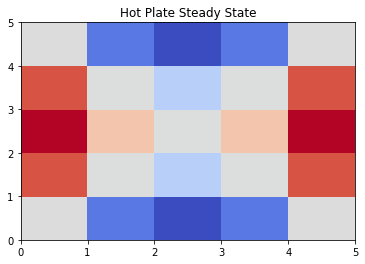

(array([49.99999999, 31.73076921, 26.9230769 , 31.73076922, 49.99999999,
        68.26923075, 49.99999997, 44.2307692 , 49.99999998, 68.26923076,
        73.07692306, 55.76923074, 49.99999997, 55.76923075, 73.07692307,
        68.26923076, 49.99999998, 44.23076921, 49.99999998, 68.26923076,
        49.99999999, 31.73076922, 26.92307691, 31.73076922, 50.        ]),
 True,
 76)

In [181]:
hot_plate(5,omega=1,maxiter=np.inf,plot=True)

In [182]:
# Problem 7
def prob7():
    """Run hot_plate() with omega = 1, 1.05, 1.1, ..., 1.9, 1.95, tol=1e-2,
    and maxiter = 1000 with A and b generated with n=20. Plot the iterations
    computed as a function of omega.
    """
    #init list to keep track of number of iterations
    num_iters = []
    
    #list of omegas
    ws = np.arange(1,2,0.05)
    for w in ws:
        #use each omega and record number of iterations
        num_iters.append(hot_plate(20,omega=w,tol=1e-2,maxiter=1000)[2])
    
    #plot, bro
    plt.plot(ws,num_iters)
    plt.xlabel('omega')
    plt.ylabel("number of iterations")
    plt.title("omega value vs. number of iterations till convergence")

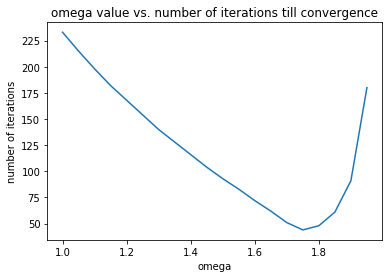

In [183]:
prob7()